In [3]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv("OpTransactionHistory10-07-2020.csv")
data.head()

,Sno,ValueDate,TransactionDate,ChequeNumber,TransactionRemarks,WithdrawalAmount,DepositAmount,Balance
0,1,13-07-2019,15-07-2019,-,UPI/919410941037/NA/q18489499@ybl/ ...,1000.0,0.0,30844.18
1,2,13-07-2019,15-07-2019,-,IPS/MANESH PHAR/201907131104/000000001602/CHEN...,705.0,0.0,30139.18
2,3,17-07-2019,17-07-2019,-,VIN/INERGLOBE A/201907171127/919805963327/ ...,350.0,0.0,29789.18
3,4,17-07-2019,17-07-2019,-,ATM/SACWF854/CASH WDL/17-07-19 ...,900.0,0.0,28889.18
4,5,23-07-2019,23-07-2019,-,ATM/SACWF854/CASH WDL/23-07-19 ...,200.0,0.0,28689.18


In [5]:
data.describe(include = 'all')


,Sno,ValueDate,TransactionDate,ChequeNumber,TransactionRemarks,WithdrawalAmount,DepositAmount,Balance
count,594.000000,594,594,594,594,594.000000,594.000000,594.000000
unique,NaN,207,171,1,593,NaN,NaN,NaN
top,NaN,08-03-2020,16-03-2020,-,POSDEC CHG/17-08-2019/1685+GST ...,NaN,NaN,NaN
freq,NaN,12,22,594,2,NaN,NaN,NaN
mean,298.436027,NaN,NaN,NaN,NaN,291.358266,330.368013,10432.161953
std,172.864060,NaN,NaN,NaN,NaN,1391.307367,2030.754453,11626.649297
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,-1899.720000
25%,149.250000,NaN,NaN,NaN,NaN,20.000000,0.000000,1696.265000
50%,297.500000,NaN,NaN,NaN,NaN,59.500000,0.000000,4656.515000
75%,445.750000,NaN,NaN,NaN,NaN,179.500000,0.000000,25743.277500


In [24]:
#preprocessing
date = []
withdrawal = []
deposit = []
for a in data.ValueDate:
    date.append(a)
    
for a in data.WithdrawalAmount:
    withdrawal.append(a)
    
for a in data.DepositAmount:
    deposit.append(a)


In [27]:
data['ValueDate'] = pd.to_datetime(data['ValueDate'])
data.dtypes


Sno                            int64
ValueDate             datetime64[ns]
TransactionDate               object
ChequeNumber                  object
TransactionRemarks            object
WithdrawalAmount             float64
DepositAmount                float64
Balance                      float64
dtype: object

In [42]:
#trying preprocessing
month = data.groupby([data.ValueDate.dt.year, data.ValueDate.dt.month])
print(month.groups)

grouped = data.groupby([data.ValueDate.dt.month])
print (grouped['WithdrawalAmount'].agg(np.sum))

{(2019, 1): Int64Index([22, 23, 61, 62, 137, 138, 139, 209, 210, 211, 283, 284], dtype='int64'), (2019, 2): Int64Index([ 24,  25,  26,  27,  63,  64,  65, 140, 141, 142, 143, 144, 145,
            212, 213, 214, 215, 216, 217, 285, 286],
           dtype='int64'), (2019, 3): Int64Index([28, 29, 66, 67, 68, 69, 146, 147, 218, 219, 287, 288, 289, 290], dtype='int64'), (2019, 4): Int64Index([30, 31, 70, 71, 72, 148, 149, 150, 151, 220, 221, 222, 291, 292,
            293],
           dtype='int64'), (2019, 5): Int64Index([73, 152, 153, 154, 223, 224, 225, 294, 295, 296, 297, 298, 299,
            300, 301, 302],
           dtype='int64'), (2019, 6): Int64Index([32, 74, 75, 155, 156, 157, 158, 159, 226, 227, 228, 229], dtype='int64'), (2019, 7): Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21, 230, 231, 232, 233],
           dtype='int64'), (2019, 8): Int64Index([ 33,  34,  35,  36,  38,  39,  40,  41,  42

<BarContainer object of 594 artists>

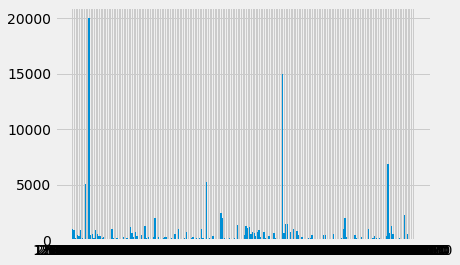

In [12]:
plt.bar(date,withdrawal)

#changes to make- instead of only date, change it to month wise category(preprocessing)

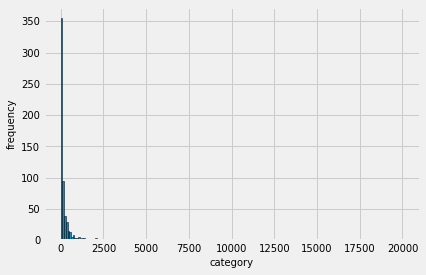

In [22]:
plt.hist(withdrawal,bins=200, edgecolor='black')
plt.xlabel('category',size = 10)
plt.ylabel('frequency', size = 10)
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10) 
#plt.tight_layout()

#changes to make - ₹100 intervals